In [1]:
!nvidia-smi

Mon Nov 13 03:55:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
#change the drive
import os
ROOT="/content/drive/MyDrive/Regression using ANN"
os.chdir(ROOT)

In [5]:
!pwd

/content/drive/MyDrive/Regression using ANN


In [9]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [11]:
housing=fetch_california_housing()

In [12]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [14]:
X=pd.DataFrame(housing.data, columns=housing.feature_names)

In [15]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
y=pd.DataFrame(housing.target, columns=['target'])

In [17]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [18]:
X.shape

(20640, 8)

In [19]:
y.shape

(20640, 1)

In [20]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)

In [22]:
X_train_full.shape

(15480, 8)

In [23]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
5363,6.6260,51.0,5.532213,0.974790,771.0,2.159664,34.04,-118.42
19755,2.1898,30.0,4.509091,0.945455,410.0,2.484848,40.18,-122.21
4885,2.1667,37.0,3.272152,1.056962,2173.0,4.584388,34.02,-118.26
13043,6.8869,6.0,7.382385,1.030075,2354.0,2.528464,38.51,-121.06


In [25]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [26]:
X_train.shape

(11610, 8)

In [27]:
X_valid.shape

(3870, 8)

In [34]:
X_train.shape[1:]

(8,)

In [33]:
LAYER = [
  tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(5,activation="relu"),
  tf.keras.layers.Dense(1)
]

In [36]:
model=tf.keras.models.Sequential(LAYER)

In [37]:
## for calculating accuracy score (r2 score)
def coeff_determination(y_true,y_pred):
  from keras import backend as K
  SS_res= K.sum(K.square(y_true-y_pred))
  SS_tot=K.sum(K.square(y_true-K.mean(y_true)))
  return (1-SS_res/(SS_tot+K.epsilon()))

In [38]:
LOSS='mse'
OPTIMIZER="sgd"
model.compile(optimizer=OPTIMIZER,loss=LOSS, metrics=[coeff_determination])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
30*10+10+10*5+5+5*1+1

371

In [45]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test=scaler.fit_transform(X_test)


In [46]:
EPOCHS=10
history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 [==============================] - 8s 6ms/step - loss: 0.6564 - coeff_determination: 0.4790 - val_loss: 0.4896 - val_coeff_determination: 0.6088
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4288 - coeff_determination: 0.6580 - val_loss: 0.4451 - val_coeff_determination: 0.6423
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3991 - coeff_determination: 0.6827 - val_loss: 0.4325 - val_coeff_determination: 0.6497
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3837 - coeff_determination: 0.6934 - val_loss: 0.4423 - val_coeff_determination: 0.6463
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3711 - coeff_determination: 0.7018 - val_loss: 0.4300 - val_coeff_determination: 0.6525
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3620 - coeff_determination: 0.7074 - val_loss: 0.4429 - val_coeff_determination: 0.6454
Epoch 7/10
363/3

In [47]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.656364,0.479040,0.489551,0.608758
1,0.428770,0.657996,0.445113,0.642336
2,0.399094,0.682675,0.432455,0.649723
3,0.383741,0.693406,0.442340,0.646317
4,0.371138,0.701830,0.429978,0.652501
5,0.361973,0.707443,0.442891,0.645410
6,0.355843,0.716347,0.421507,0.660941
7,0.353218,0.720403,0.413889,0.666259
8,0.345899,0.722366,0.420606,0.660921
9,0.338576,0.728513,0.409277,0.668460


<Axes: >

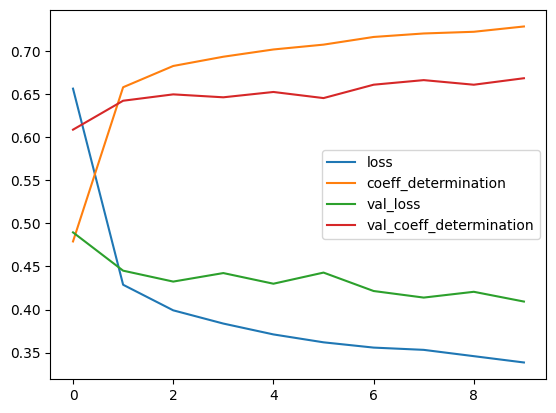

In [48]:
pd.DataFrame(history.history).plot()

In [49]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3698 - coeff_determination: 0.6906


[0.3698142468929291, 0.6905958652496338]

In [50]:
new=X_test[0]

In [52]:
new.shape

(8,)

In [53]:
new=new.reshape((1,8))

In [54]:
new.shape

(1, 8)

In [55]:
model.predict(new)

1/1 [==============================] - 0s 81ms/step


array([[0.6870742]], dtype=float32)